In [5]:
import hdbscan
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
import os
import json
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

In [11]:
MATERIAL_PATH = "../All_mat_new_test_score_with_horz_flat_index.csv"
#DATA_PATH = "../../data"

# "henry's local data path"
DATA_PATH = "../../MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DATA"

## Start with Anupam's list of materials

In [12]:
material_df = pd.read_csv("../All_mat_new_test_score_with_horz_flat_index.csv", index_col="ID")
print(material_df.shape)
material_df.head()

(5270, 24)


,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,...,D,E,F,radio,f_orb,sg_sto_group,percentage_flat
ID,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,276.0,24.2
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN


In [13]:
# Select flat materials only
flat_df = material_df[material_df.horz_flat_seg > 0]
flat_df.shape

(2005, 24)

## Fingerprint Functions Here
Fingerprint functions take material ID as only input

array([ 0.,  0.,  6., 48., 14., 18., 21.,  5.,  3.,  2., 10., 12., 25.,
       21., 23., 21., 25., 27., 33., 35.,  0.,  0.,  0., 63., 18., 15.,
        9.,  0.,  0.,  0.,  0., 12.,  9., 11., 24., 14., 34., 79., 63.,
       53.,  0.,  0.,  6., 46., 18.,  6., 31.,  6.,  3.,  3., 11., 15.,
       24., 26., 25., 24., 29., 21., 26., 30.])

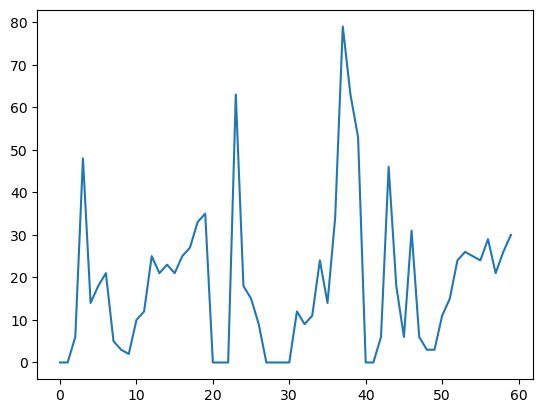

In [14]:
def calc_fingerprint(material_id, fingerprint_length, e_range=[-8, 8]):
    global edges
    filename_bands=DATA_PATH+"/bands/"+material_id+'.json'
    if not os.path.isfile(filename_bands):
        print("!!!! No such file %s" % filename_bands)
    bands_dict=json.load(open(filename_bands))

    fingerprint = np.zeros(fingerprint_length)
    
    k_branches = bands_dict["branches"]
    length_per_branch = fingerprint_length // len(k_branches)

    energies = np.array(bands_dict["bands"]["1"])

    for i, branch in enumerate(k_branches):
        branch_energies = energies[:, branch["start_index"]:branch["end_index"]+1]
        # print(i, branch_energies)
        counts, edges = np.histogram(branch_energies, bins=length_per_branch, range=e_range)
        fingerprint[i*length_per_branch : (i+1)*length_per_branch] = counts
    
    return fingerprint
    

fp = calc_fingerprint("2dm-1", 60)
plt.plot(fp)
fp

In [15]:
# re-run with all materials using this line
#flat_df = material_df

fingerprint_length = 60
finger_print_array = np.zeros([len(flat_df), fingerprint_length])

In [16]:
for i, material_id in enumerate(flat_df.index):
    if i % 100 == 0:
        print(i, "/", len(flat_df))

    finger_print_array[i, :] = calc_fingerprint(material_id, fingerprint_length)

print(finger_print_array)

0 / 5270
100 / 5270
200 / 5270
300 / 5270
400 / 5270
500 / 5270
600 / 5270
700 / 5270
800 / 5270
900 / 5270
1000 / 5270
1100 / 5270
1200 / 5270
1300 / 5270
1400 / 5270
1500 / 5270
1600 / 5270
1700 / 5270
1800 / 5270
1900 / 5270
2000 / 5270
2100 / 5270
2200 / 5270
2300 / 5270
2400 / 5270
2500 / 5270
2600 / 5270
2700 / 5270
2800 / 5270
2900 / 5270
3000 / 5270
3100 / 5270
3200 / 5270
3300 / 5270
3400 / 5270
3500 / 5270
3600 / 5270
3700 / 5270
3800 / 5270
3900 / 5270
4000 / 5270
4100 / 5270
4200 / 5270
4300 / 5270
4400 / 5270
4500 / 5270
4600 / 5270
4700 / 5270
4800 / 5270
4900 / 5270
5000 / 5270
5100 / 5270
5200 / 5270
[[  0.   0.   6. ...  21.  26.  30.]
 [  0.   0.   0. ...   5.   0.   0.]
 [ 42.   0. 105. ...  17.   0.   0.]
 ...
 [ 42.  92. 148. ...  97. 108.   3.]
 [ 41.  18.  39. ...  46.  43.  36.]
 [ 64.  23.  41. ...  56.  41.  26.]]


In [17]:
df = flat_df.join(pd.DataFrame(finger_print_array, index=flat_df.index))
df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,...,53,54,55,56,57,58,59
ID,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,...,26.0,25.0,24.0,29.0,21.0,26.0,30.0
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,...,58.0,68.0,25.0,33.0,5.0,0.0,0.0
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,...,81.0,107.0,169.0,127.0,17.0,0.0,0.0
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,...,49.0,89.0,11.0,48.0,67.0,81.0,122.0
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,...,33.0,38.0,35.0,39.0,45.0,41.0,48.0


In [18]:
#check for NaNs 
np.isnan(finger_print_array).sum()

0

In [19]:
df.isna().sum()[ df.isna().sum() != 0 ]

exfoliation_eg     1238
decomp_eng           82
B                    88
C                  3582
D                  4886
E                  5270
F                  5270
sg_sto_group       3265
percentage_flat    3265
dtype: int64

In [20]:
# save df
df.to_csv("materials_data_whole_database_all_k_branches_fingerprint_60.csv")

## Clustering

In [21]:
df = pd.read_csv("materials_data_whole_database_all_k_branches_fingerprint_60.csv")
fingerprint_length = 60
fingerprint_cols = [str(i) for i in range(fingerprint_length)]
fingerprint_array = df[fingerprint_cols]

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=4, p=0.2)
clusterer.fit(fingerprint_array)

labels = clusterer.labels_
df["labels"] = labels
print(np.unique(labels, return_counts=True))
df[df.labels==1].head(19)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105], dtype=int64), array([4453,    8,    5,   14,    7,    7,    6,    6,    5,    7,    4,
          6,    8,    4,    6,   14,    4,    7,    8,    8,    9,    8,
         11,    8,    5,    4,    5,    4,   10,   12,    8,   13,    8,
          4,    4,    5,    4,    6,    5,    4,    4,    4,    8,    5,
         11,    7,    5,    5,    4,    9,   11,    6,    5,    5,    5,
          5,   10,   

,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,54,55,56,57,58,59,labels
835,2dm-900,Ga2Te,AB2,143,3,3,0.78315,...,398.0,224.0,0.0,0.0,0.0,0.0,1
838,2dm-903,Ga2Te,AB2,143,3,3,0.81656,...,390.0,219.0,0.0,0.0,0.0,0.0,1
843,2dm-910,Ga2Se,AB2,143,3,3,0.87920,...,343.0,276.0,0.0,0.0,0.0,0.0,1
1641,2dm-1777,Ga2S,AB2,143,3,3,0.87920,...,319.0,309.0,91.0,0.0,0.0,0.0,1
1656,2dm-1794,Ga2S,AB2,143,3,3,0.84263,...,331.0,305.0,70.0,0.0,0.0,0.0,1


In [22]:
from ipywidgets import interact

def view_cluster(label):
    display(df[df.labels==label].head(100))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        # ax[i].bar(edges[:-1], df.loc[index][fingerprint_cols], align="edge", width=edges[1]-edges[0])?
        ax[i].plot(np.linspace(-8, 8, fingerprint_length), df.loc[index][fingerprint_cols])


    
    
interact(view_cluster, label=(-1, len(np.unique(labels))-2, 1))

interactive(children=(IntSlider(value=52, description='label', max=105, min=-1), Output()), _dom_classes=('wid…

<function __main__.view_cluster(label)>

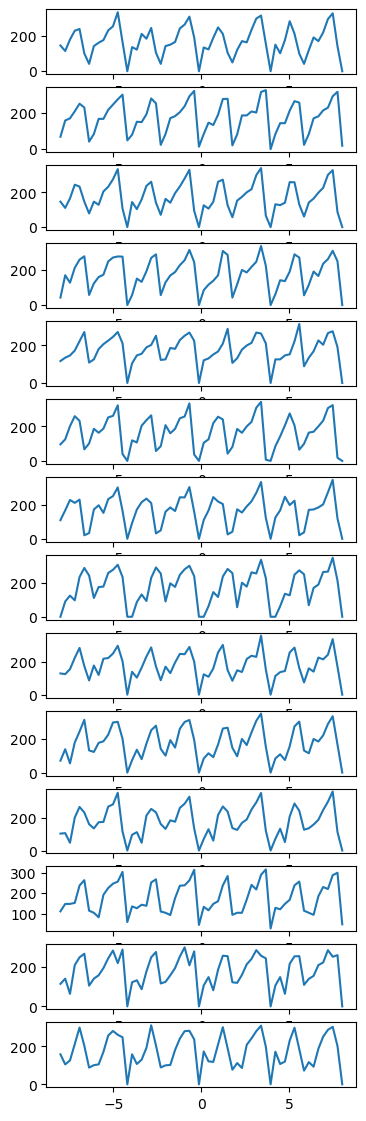

In [4]:
label = 1
num_plots = len(df[df.labels==label])

fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

for i, index in enumerate(df[df.labels==label].index):
    # ax[i].bar(edges[:-1], df.loc[index][fingerprint_cols], align="edge", width=edges[1]-edges[0])?
    ax[i].plot(np.linspace(-8, 8, fingerprint_length), df.loc[index][fingerprint_cols])

plt.show()

## T-SNE Plot

In [23]:
n_components=2
tsne = manifold.TSNE(n_components=n_components, early_exaggeration=12.0, init="pca",learning_rate=100, random_state=0, perplexity=30 ,n_iter=10000, verbose=2)
fingerprints_2d = tsne.fit_transform(fingerprint_array)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5270 samples in 0.002s...
[t-SNE] Computed neighbors for 5270 samples in 0.407s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5270
[t-SNE] Computed conditional probabilities for sample 2000 / 5270
[t-SNE] Computed conditional probabilities for sample 3000 / 5270
[t-SNE] Computed conditional probabilities for sample 4000 / 5270
[t-SNE] Computed conditional probabilities for sample 5000 / 5270
[t-SNE] Computed conditional probabilities for sample 5270 / 5270
[t-SNE] Mean sigma: 73.408827
[t-SNE] Computed conditional probabilities in 0.324s
[t-SNE] Iteration 50: error = 82.3743591, gradient norm = 0.0132815 (50 iterations in 1.678s)
[t-SNE] Iteration 100: error = 79.1293793, gradient norm = 0.0019983 (50 iterations in 1.371s)
[t-SNE] Iteration 150: error = 78.8312378, gradient norm = 0.0004368 (50 iterations in 1.320s)
[t-SNE] Iteration 200: error = 78.7757797, gradient norm = 0.0001571 (50 iterations in 1.381s)
[

[t-SNE] Iteration 4050: error = 1.3122697, gradient norm = 0.0005920 (50 iterations in 1.563s)
[t-SNE] Iteration 4100: error = 1.3120470, gradient norm = 0.0006612 (50 iterations in 1.566s)
[t-SNE] Iteration 4150: error = 1.3118253, gradient norm = 0.0006812 (50 iterations in 1.568s)
[t-SNE] Iteration 4200: error = 1.3115926, gradient norm = 0.0007281 (50 iterations in 1.567s)
[t-SNE] Iteration 4250: error = 1.3113426, gradient norm = 0.0006782 (50 iterations in 1.563s)
[t-SNE] Iteration 4300: error = 1.3111657, gradient norm = 0.0005692 (50 iterations in 1.516s)
[t-SNE] Iteration 4350: error = 1.3109491, gradient norm = 0.0005678 (50 iterations in 1.613s)
[t-SNE] Iteration 4400: error = 1.3107518, gradient norm = 0.0006483 (50 iterations in 1.564s)
[t-SNE] Iteration 4450: error = 1.3105661, gradient norm = 0.0005742 (50 iterations in 1.504s)
[t-SNE] Iteration 4500: error = 1.3103874, gradient norm = 0.0005208 (50 iterations in 1.613s)
[t-SNE] Iteration 4550: error = 1.3102098, gradien

[t-SNE] Iteration 8400: error = 1.3024864, gradient norm = 0.0002970 (50 iterations in 1.548s)
[t-SNE] Iteration 8450: error = 1.3024247, gradient norm = 0.0003616 (50 iterations in 1.585s)
[t-SNE] Iteration 8500: error = 1.3023691, gradient norm = 0.0003209 (50 iterations in 1.597s)
[t-SNE] Iteration 8550: error = 1.3023133, gradient norm = 0.0003370 (50 iterations in 1.534s)
[t-SNE] Iteration 8600: error = 1.3022579, gradient norm = 0.0002803 (50 iterations in 1.660s)
[t-SNE] Iteration 8650: error = 1.3022294, gradient norm = 0.0002528 (50 iterations in 1.989s)
[t-SNE] Iteration 8700: error = 1.3022016, gradient norm = 0.0002802 (50 iterations in 2.160s)
[t-SNE] Iteration 8750: error = 1.3021145, gradient norm = 0.0002948 (50 iterations in 2.102s)
[t-SNE] Iteration 8800: error = 1.3020846, gradient norm = 0.0002925 (50 iterations in 2.037s)
[t-SNE] Iteration 8850: error = 1.3020430, gradient norm = 0.0003086 (50 iterations in 1.938s)
[t-SNE] Iteration 8900: error = 1.3019918, gradien

C:\Users\hkpen\AppData\Local\Temp\ipykernel_9888\3455338055.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo')


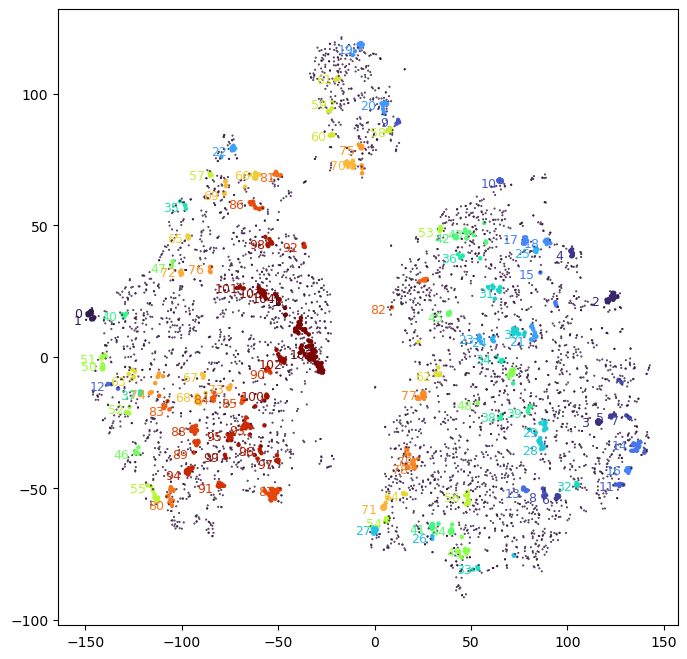

In [29]:
fig = plt.figure(figsize=(8,8))
size=np.ones((len(labels),1))*5
size[labels==-1]=0.2
 
unique_label,cluster_rep_index, counts = np.unique(labels, return_index=True, return_counts=True)
cmap = plt.cm.get_cmap('turbo')
norm = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
    
for rep_id in cluster_rep_index:
        col=cmap(norm(labels[rep_id]))
        plt.annotate(labels[rep_id],fingerprints_2d[rep_id,:]+[-7,-1],color=col,alpha=1, weight='normal', ha='center', va='center', size=9).draggable()

plt.scatter(fingerprints_2d[:,0], fingerprints_2d[:,1],s=size, c=labels*5, cmap="turbo")